In [2]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/full_dataset_scoring_2/score/results'

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('ticks')

sns.set_context('paper')
sns.set(font='Arial')
sns.set_style('ticks')

import matplotlib.patches as mpatches

In [2]:
pyemma_scores_dih = np.load('pyemma_scores_dih.npy')
pyemma_scores_dist = np.load('pyemma_scores_dist.npy')

In [111]:
pyemma_scores_dih[2]

[[9.0500794014863502,
  8.7421678222913304,
  9.6764071641980109,
  9.4369029079599045,
  9.3531099180117572],
 [8.421122251495861,
  7.8875311654911746,
  8.7932138531106112,
  9.342434272923656,
  7.9916192684640324],
 [6.8893970593656109,
  6.501725298637802,
  7.892425971768712,
  7.2941835389049716,
  8.3303044707541325],
 [6.3391225753029063,
  5.8761342203209344,
  6.6499382015083013,
  6.4813721455214868,
  6.9990695508216536],
 [6.3891226098372442,
  6.0231600278509259,
  6.9050691600105054,
  'error',
  7.5894844464497426],
 [5.3615985741164991,
  5.7243086172624498,
  7.5121426757709138,
  6.1832441862640151,
  6.3470478196188846],
 [6.0579751949356897, 6.869819205942119, 'error', 'error', 7.665714781552718]]

In [112]:
pyemma_scores_dist[2]

[[8.514506673721673,
  8.0597528421376818,
  9.2606916903060466,
  9.3706903617125157,
  9.1483099207033423],
 [7.7842508328784854,
  6.8513870206576577,
  7.6114748680525546,
  7.8064470045388354,
  6.9899013368153922],
 [5.6014576802197986,
  8.0723638788861383,
  7.9633012473740896,
  7.6738003708506692,
  6.3678564935211224],
 [6.1878469777212848,
  5.1618726888706039,
  6.3123997208842342,
  7.6768108645210082,
  6.4621362069125761],
 [7.0086133499167271,
  6.4424438942073872,
  6.853739425924366,
  4.9190336242454746,
  5.400048225957784],
 [4.6266953048487593,
  5.0371434549783833,
  5.5636520699662029,
  4.4783965565480441,
  6.5629324112440166],
 ['error',
  5.4794984423078299,
  5.6354233368314244,
  5.8288969754472033,
  6.0639285537898067]]

In [113]:
# remove 'error'

In [115]:
pyemma_scores_dih_ = []
for x in pyemma_scores_dih:
    pyemma_scores_dih_.append([])
    for y in x:
        pyemma_scores_dih_[-1].append([])
        for z in y:
            if z == 'error':
                #pyemma_scores_dih_[-1][-1].append(np.nan)
                continue
            else:
                pyemma_scores_dih_[-1][-1].append(z)
                
pyemma_scores_dih = pyemma_scores_dih_  

pyemma_scores_dist_ = []
for x in pyemma_scores_dist:
    pyemma_scores_dist_.append([])
    for y in x:
        pyemma_scores_dist_[-1].append([])
        for z in y:
            if z == 'error':
                #pyemma_scores_dist_[-1][-1].append(np.nan)
                continue
            else:
                pyemma_scores_dist_[-1][-1].append(z)
                
pyemma_scores_dist = pyemma_scores_dist_                

In [94]:
# make dataframe

In [97]:
import pandas as pd

In [116]:
x1 = ['dih_100', 'dih_500', 'dih_1000', 'dih_2000', 'dih_3000', 'dih_4000', 'dih_5000']
x2 = ['dist_100', 'dist_500', 'dist_1000', 'dist_2000', 'dist_3000', 'dist_4000', 'dist_5000']

x = x1 + x2

y1 = list(pyemma_scores_dih[2])
y2 = list(pyemma_scores_dist[2])
y = y1 + y2

df_plot = dict()
df_plot['Model'] = []
df_plot['VAMP2'] = []

for i, model in enumerate(x):
    for score in y[i]:
        df_plot['Model'].append(model)
        df_plot['VAMP2'].append(score)

df_plot = pd.DataFrame(df_plot)

y1_train = list(pyemma_scores_dih[3])
y2_train = list(pyemma_scores_dist[3])
y_train = y1_train + y2_train

df_plot_train = dict()
df_plot_train['Model'] = []
df_plot_train['VAMP2'] = []

for i, model in enumerate(x):
    for score in y_train[i]:
        df_plot_train['Model'].append(model)
        df_plot_train['VAMP2'].append(score)

df_plot_train = pd.DataFrame(df_plot_train)

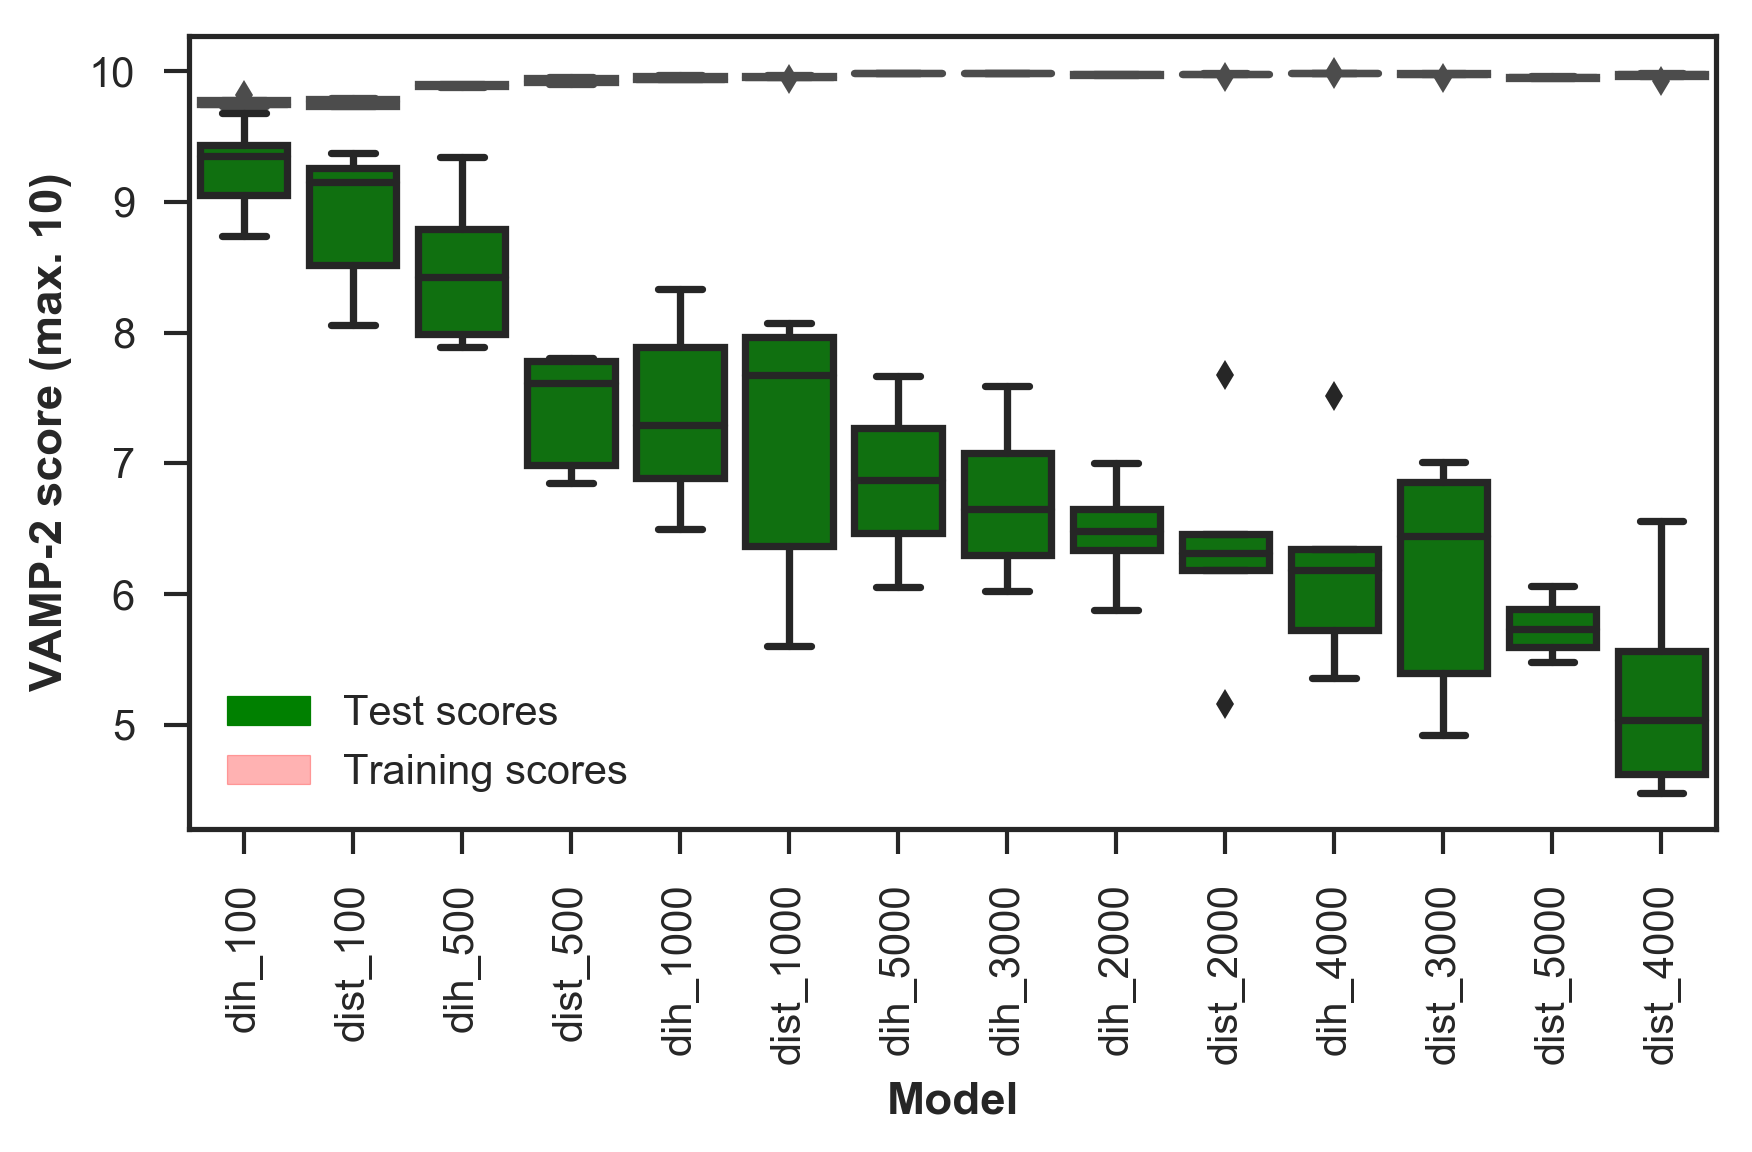

In [120]:
x1 = ['dih_100', 'dih_500', 'dih_1000', 'dih_2000', 'dih_3000', 'dih_4000', 'dih_5000']
x2 = ['dist_100', 'dist_500', 'dist_1000', 'dist_2000', 'dist_3000', 'dist_4000', 'dist_5000']

x = x1 + x2

y1 = list(pyemma_scores_dih[2])
y2 = list(pyemma_scores_dist[2])
y = y1 + y2
order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.nanmean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)

plt.rcParams['axes.labelweight'] = 'bold'
plt.figure(dpi=300)
ax = sns.boxplot(data=df_plot_train, x='Model', y='VAMP2', order=[i[0] for i in order_means], color='red')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.boxplot(data=df_plot, x='Model', y='VAMP2', order=[i[0] for i in order_means], color='green')    
plt.xlabel('Model')
plt.ylabel('VAMP-2 score (max. 10)')
plt.xticks(rotation=90)
test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores', alpha=0.3)
plt.legend(handles=[test_patch, train_patch])
plt.tight_layout()
plt.savefig('all_models_vamp2_transptrain.pdf')
plt.show()

In [85]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/full_dataset_scoring_2/score/results'

In [3]:
# check highest mean score and SD

In [8]:
np.mean(pyemma_scores_dih[2][0])

9.2517334427894689

In [9]:
np.std(pyemma_scores_dih[2][0])

0.3241092914998005